In [1]:
# R version 4.1.0 #
# Load packages: Seurat_4.1.1, RColorBrewer_1.1-3, ggplot2_3.3.6, extrafont_0.18,stringr_1.4.0 
packages = c('Seurat','RColorBrewer','ggplot2','extrafont','stringr')

for (p in packages){
    suppressPackageStartupMessages(eval(bquote(library(.(p)))))
}
bnum_table <- read.delim('source_data/included/ecoli_bnum_table_updated_2.txt',sep='\t')

get_gene_list <- function(name,seurat){
    bnums <- c()
    genes <- c()
    for (annotation_type in c('go','tf','sr')){
        data_name = str_replace("source_data/included/Ecoli_RENAME_index.txt","RENAME",annotation_type)
        data = readLines(data_name)
        for (line in data[grepl(name, data)]){
            bnum <- strsplit(line,'\t')[[1]][1]
            if (bnum %in% bnum_table[['bnum']]){
                gene <- bnum_table[bnum_table['bnum']==bnum,'gene']
                if (gene %in% rownames(seurat)){
                    bnums <- c(bnums,bnum)
                    genes <- c(genes,gene)
                }
            }
        }
    }
    return(genes)
}


In [2]:
seurat <- readRDS('source_data/from_GEO/ds_seurat_PCA_UMAP_clusters_ds38_min10_v4.rds')

# subset seurat object by cell types included in text up to this point
to_include = c('t1_2hr_WT_20210722','t1_20min_WT_20210722','t1_undil_WT_20210722',
               't2_20min_WT_20210722','t2_undil_WT_20210722','t3_undil_WT_20210722',
               't4_2hr_WT_20210722','t4_1hr_WT_20210722','t4_20min_WT_20210722','t4_undil_WT_20210722',
               't1_2hr_metG_20210623','t1_20min_metG_20210623','t1_undil_metG_20210623',
               't2_2hr_metG_20210623','t2_20min_metG_20210623','t2_undil_metG_20210623','t3_undil_metG_20210623',
               't4_2hr_metG_20210623','t4_20min_metG_20210623','t4_undil_metG_20210623',
               'WT_1hr_20220331','WT_30min_20220331','WT_10min_20220331','WT_3min_20220331','WT_stat_20220331',
               'metG6_20201018_1','metG5_20201018_1','metG4_20201018_1','metG3_20201018_1','metG2_20200926','metG1_20200926','WT_10min_20220210')
seurat@active.ident <- seurat$cell.type
seurat <- subset(seurat,idents=to_include)

In [3]:
## save Table S1
seurat@active.ident <- seurat$seurat_clusters
avg.expression <- data.frame(AverageExpression(seurat,slot='data')$RNA)
avg.expression <- subset(avg.expression,rowSums(avg.expression)>0)
colnames(avg.expression) <- c('Early_Stationary','Stationary','Persister','Early_Lag','Late_Lag','Early_Exponential','Late_Exponential')
write.table(avg.expression,file='tables/TableS1.csv',sep=',',quote=FALSE)


As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
First group.by variable `ident` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.


Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


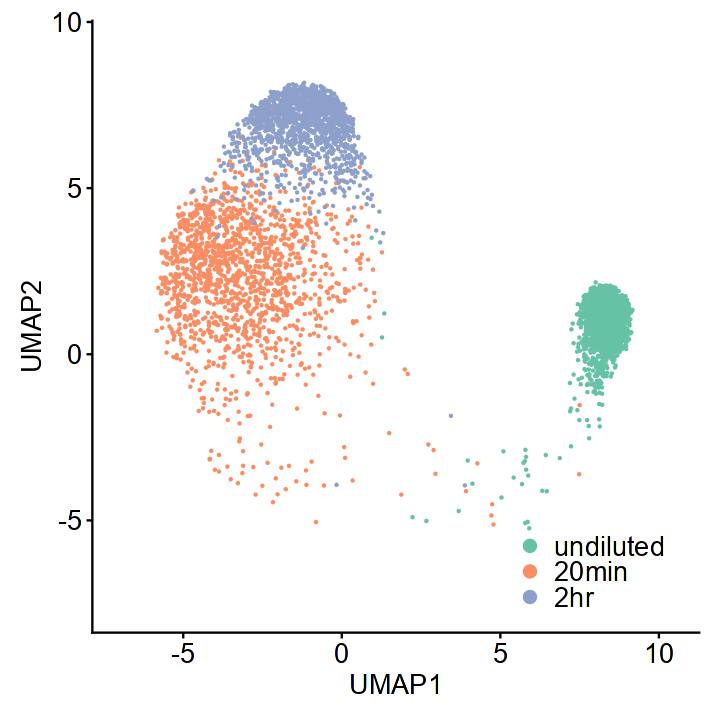

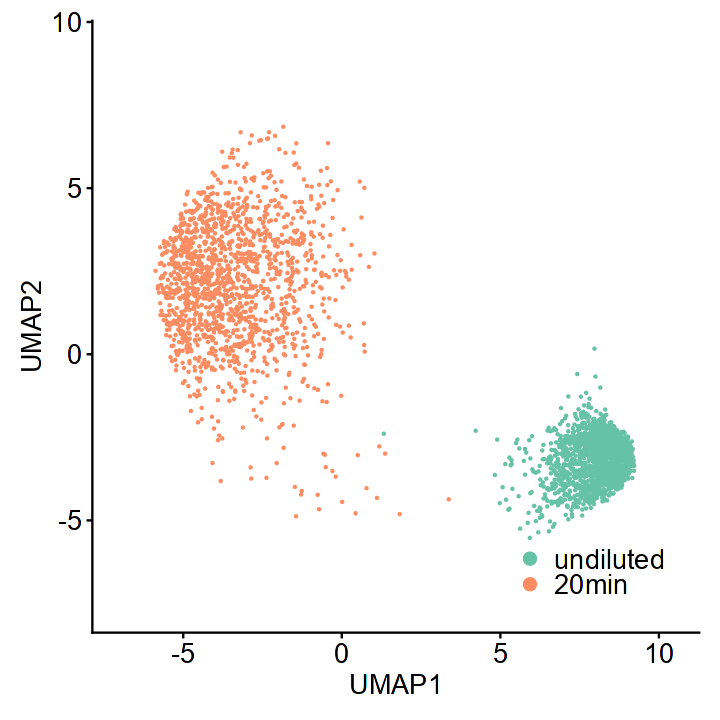

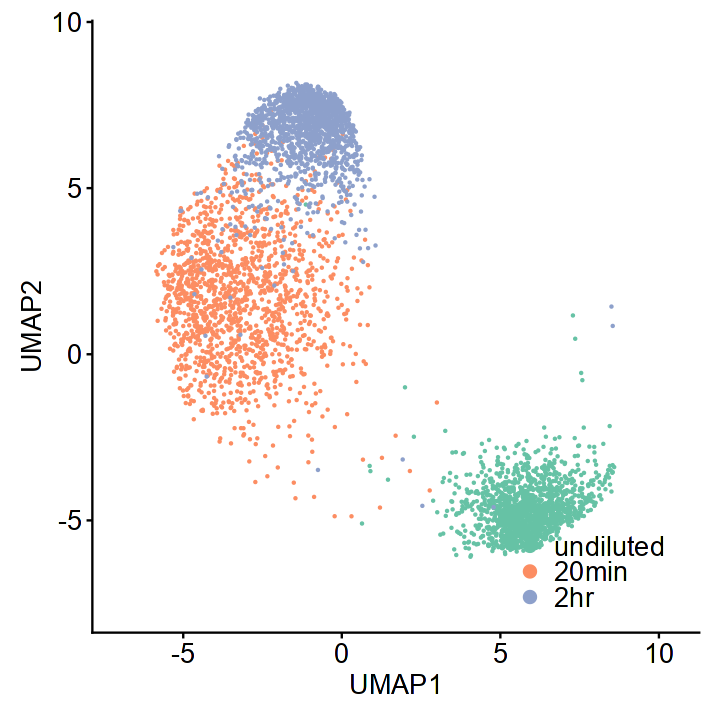

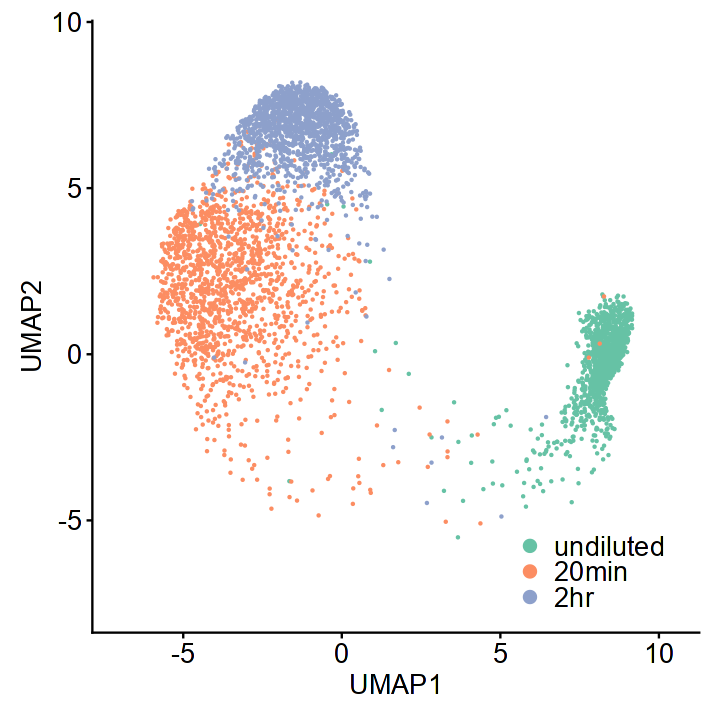

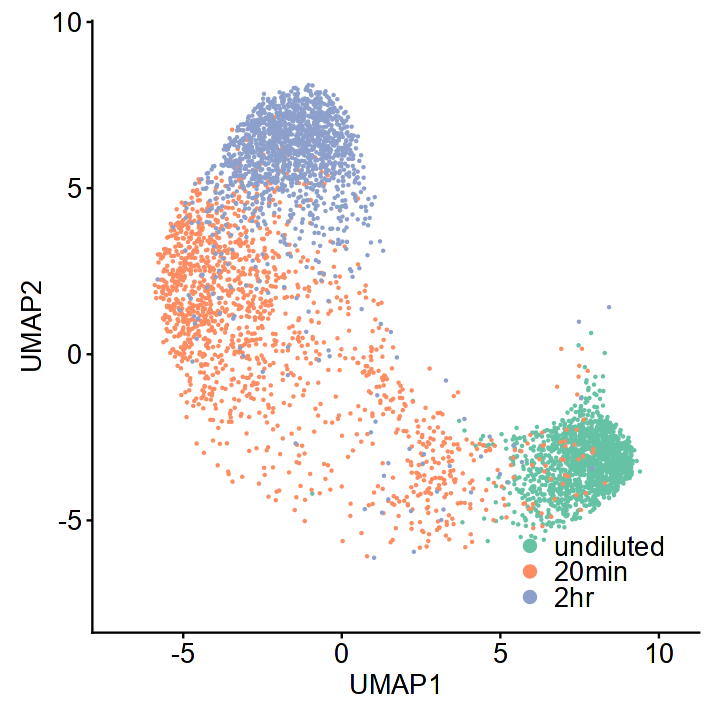

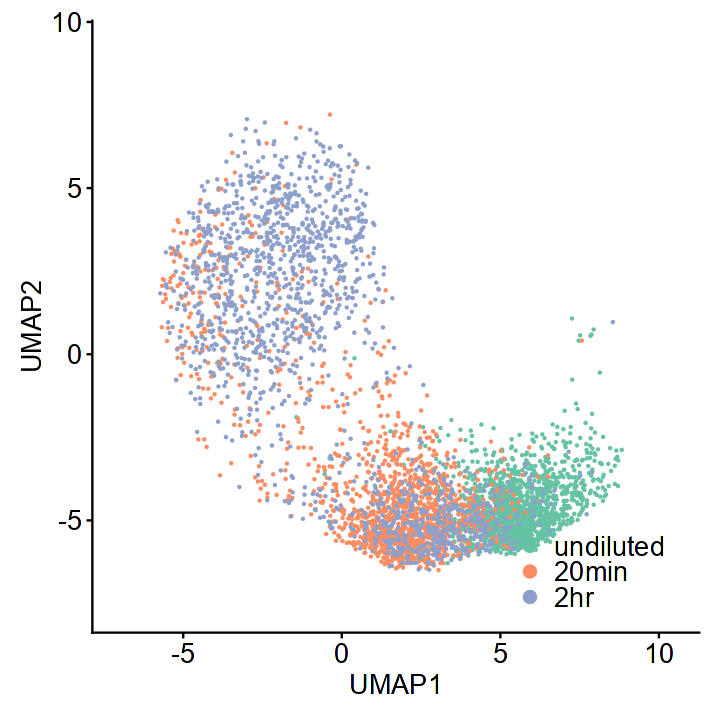

In [4]:
seurat$cell.type <- factor(seurat$cell.type)
seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(7,"Set2")
n_cells_per = 1500
alpha = 1
pt.size = 0.2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

ids = levels(seurat$cell.type)[(grepl('WT',levels(seurat$cell.type)))&(grepl('t1',levels(seurat$cell.type)))]
sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=c('t1_2hr_WT_20210722','t1_20min_WT_20210722','t1_undil_WT_20210722')) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c("undiluted", "20min","2hr"), values = alpha(my_cols[c(1:3)],alpha))+ xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(family='Arial',size=16),legend.text=element_text(size=16),legend.position=c(0.7,0.1))
ggsave('figures/fig1d_WT_t1_umap.pdf',width = 5, height = 5)

ids = levels(seurat$cell.type)[(grepl('WT',levels(seurat$cell.type)))&(grepl('t2',levels(seurat$cell.type)))]
sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=c('t2_20min_WT_20210722','t2_undil_WT_20210722')) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c("undiluted","20min"), values = alpha(my_cols[c(1,2)],alpha))+ xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(family='Arial',size=16),legend.text=element_text(size=16),legend.position=c(0.7,0.1))
ggsave('figures/fig1d_WT_t2_umap.pdf',width = 5, height = 5)

ids = levels(seurat$cell.type)[(grepl('WT',levels(seurat$cell.type)))&(grepl('t4',levels(seurat$cell.type)))&(!grepl('1hr',levels(seurat$cell.type)))]
sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=c('t4_2hr_WT_20210722','t4_20min_WT_20210722','t4_undil_WT_20210722')) + 
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c("undiluted", "20min","2hr"), values = alpha(my_cols[c(1:3)],alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(family='Arial',size=16),legend.text=element_text(size=16),legend.position=c(0.7,0.1))
ggsave('figures/fig1d_WT_t4_umap.pdf',width = 5, height = 5)

ids = levels(seurat$cell.type)[(grepl('metG',levels(seurat$cell.type)))&(grepl('t1',levels(seurat$cell.type)))]
sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=c('t1_2hr_metG_20210623','t1_20min_metG_20210623','t1_undil_metG_20210623')) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c("undiluted", "20min","2hr"), values = alpha(my_cols[c(1:3)],alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(family='Arial',size=16),legend.text=element_text(size=16),legend.position=c(0.7,0.1))
ggsave('figures/fig1d_metG_t1_umap.pdf',width = 5, height = 5)

ids = levels(seurat$cell.type)[(grepl('metG',levels(seurat$cell.type)))&(grepl('t2',levels(seurat$cell.type)))]
sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=c('t2_2hr_metG_20210623','t2_20min_metG_20210623','t2_undil_metG_20210623')) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c("undiluted", "20min","2hr"), values = alpha(my_cols[c(1:3)],alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(family='Arial',size=16),legend.text=element_text(size=16),legend.position=c(0.7,0.1))
ggsave('figures/fig1d_metG_t2_umap.pdf',width = 5, height = 5)

ids = levels(seurat$cell.type)[(grepl('metG',levels(seurat$cell.type)))&(grepl('t4',levels(seurat$cell.type)))&(!grepl('quarter',levels(seurat$cell.type)))]
sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=c('t4_2hr_metG_20210623','t4_20min_metG_20210623','t4_undil_metG_20210623')) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c("undiluted", "20min","2hr"), values = alpha(my_cols[c(1:3)],alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(family='Arial',size=16),legend.text=element_text(size=16),legend.position=c(0.7,0.1))
ggsave('figures/fig1d_metG_t4_umap.pdf',width = 5, height = 5)



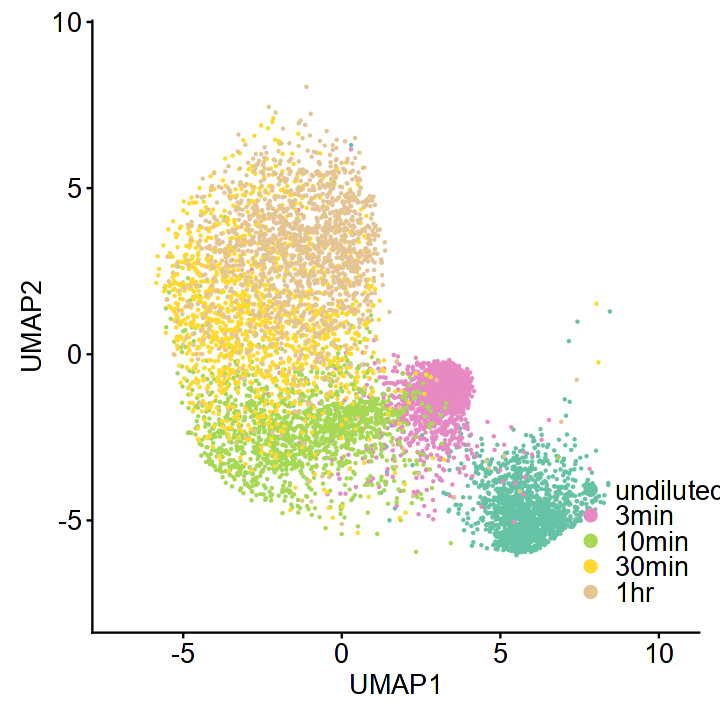

In [5]:
seurat$cell.type <- factor(seurat$cell.type)
seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(7,"Set2")
n_cells_per = 1500
alpha = 1
pt.size = 0.2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

ids = levels(seurat$cell.type)[(grepl('WT',levels(seurat$cell.type)))&(grepl('20220331',levels(seurat$cell.type)))]
sub_seurat=subset(seurat,idents=ids)
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,order=c('WT_1hr_20220331','WT_30min_20220331','WT_10min_20220331','WT_3min_20220331','WT_stat_20220331')) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c("undiluted", "3min","10min","30min","1hr"), values = alpha(my_cols[c(1,4:7)],alpha))+ xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(size=16),legend.text=element_text(size=16),legend.position=c(0.8,0.15))
ggsave('figures/fig1E_WT_20220331_umap.pdf',width = 5, height = 5)




[1] "0" "1" "2" "3" "4" "5" "6"


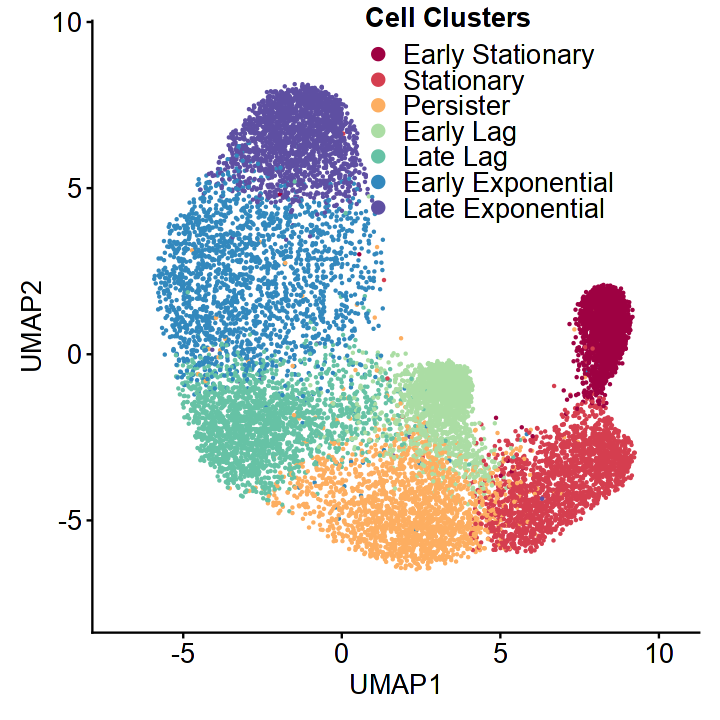

In [6]:
seurat@active.ident <- seurat$seurat_clusters
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 2000
alpha = 1
pt.size = 0.2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

ids = levels(seurat$seurat_clusters)
print(ids)

sub_seurat=subset(seurat,idents=ids)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$seurat_clusters)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}

DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(name='Cell Clusters',labels = c("Early Stationary", "Stationary","Persister","Early Lag","Late Lag","Early Exponential","Late Exponential"), values = alpha(my_cols[c(1,2,4,7,8,9,10)],alpha))+ xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(size=16),legend.text=element_text(size=16),legend.position=c(0.45,0.85),legend.title = element_text(face = "bold"))
ggsave('figures/fig1F_clusters_umap.pdf',width = 5, height = 5)
